<a href="https://colab.research.google.com/github/wonyoung-ji/asiae_edu/blob/master/NLP/200910_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%98%A4%EB%8A%98%EC%9D%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지설치

In [45]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
! sudo apt-get install g++ openjdk-7-jdk #Install Java 1.7+ 
#!sudo apt-get install python-dev; pip install konlpy # Python 2.x 
!sudo apt-get install python3-dev; pip3 install konlpy # Python 3.x 
!sudo apt-get install curl 
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import requests
from bs4 import BeautifulSoup as bs

## 웹크롤링을 이용한 데이터 수집

In [5]:
# 오늘의집 커뮤니티 리뷰가져오기
def raw_reviews(num):
  content = []
  # url 생성
  url='https://ohou.se/questions?affect_type=Home&affect_id=0&page='
  for num in range(num):
    page=str(num)
    new_url=url + page
    # 웹크롤링
    html=requests.get(new_url).text
    soup=bs(html,'html.parser')
    body = soup.find_all('article',class_='questions-item')
    for b in body:
       p_tag = b.find_all('p')
       for p in p_tag:
         content += [p.text]
  return content  

In [6]:
import pandas as pd
# 약 3주간의 리뷰
reviews=pd.DataFrame(raw_reviews(560))

In [7]:
reviews.columns=['content']
reviews

,content
0,이 방 벽지랑 바닥 도배는 그대로 가져갈 생각인데여기에 원목 창살 침대 잘 어울릴까...
1,베란다 장판밑에 나무로 깔려있는데 이번 장마때 나무가 썪었는지 틀어졌더라구요..다 ...
2,이 서랍장 정보가 궁금해서요 ㅠ
3,다이소에 파는 줄눈보수제를 화장실 바닥 타일 사이에 했는데.. 제가 사용법을 잘 못...
4,"벽지랑 장판은 다 구입해놓은 상태인데셀프로 도저히 못 하겠어서 올려봅니다 ㅠㅠ벽지,..."
...,...
2795,태풍온다고 해서창문을 비닐로 막아논 상태구요...이제 커튼 레일을 달건데집 창과 벽...
2796,여기서 중자 살려고 하는데요 제가 커텐 달고 싶은 위치 길이 재봤는데 가로가 223...
2797,3평보다 조금 큰 방에서 생활하고 있습니다.좌식 생활 하다보니 장시간 컴퓨터 작업을...
2798,승용차인데 넣어질까요?


In [8]:
reviews.to_csv("ohou_reviews.csv", mode='w')

## 데이터 전처리

In [9]:
from konlpy.tag import Mecab
mecab=Mecab()
from konlpy.tag import Okt
okt=Okt()

reviews['content'] = reviews['content'].str.replace("[^가-힣ㄱ-ㅎㅏ-ㅣ|\\s]",' ')                       # 한글 이외의 단어 제외
reviews['content'] = reviews['content'].apply(lambda x:' '.join([ w for w in str(x).split() if len(w)>1]))   # 1글자 삭제
tokenized_doc = reviews['content'].apply(lambda x: okt.pos(x, stem=True))                               # 품사태깅

In [10]:
tokenized_doc[0]

[('벽지', 'Noun'),
 ('랑', 'Josa'),
 ('바닥', 'Noun'),
 ('도배', 'Noun'),
 ('는', 'Josa'),
 ('그대로', 'Noun'),
 ('가져가다', 'Verb'),
 ('생각', 'Noun'),
 ('인데', 'Josa'),
 ('여기', 'Noun'),
 ('에', 'Josa'),
 ('원목', 'Noun'),
 ('창살', 'Noun'),
 ('침대', 'Noun'),
 ('어울리다', 'Verb'),
 ('요', 'Noun'),
 ('창문', 'Noun'),
 ('에는', 'Josa'),
 ('블라인드', 'Noun'),
 ('를', 'Josa'),
 ('생각', 'Noun'),
 ('이에요', 'Josa'),
 ('블라인드', 'Noun'),
 ('도', 'Josa'),
 ('같다', 'Adjective'),
 ('우드', 'Noun'),
 ('계열', 'Noun'),
 ('로', 'Josa'),
 ('맞추다', 'Verb'),
 ('되다', 'Verb'),
 ('고민', 'Noun'),
 ('이다', 'Adjective'),
 ('ㅜㅠㅠ', 'KoreanParticle'),
 ('침대', 'Noun'),
 ('를', 'Josa'),
 ('창문', 'Noun'),
 ('밑', 'Noun'),
 ('에', 'Josa'),
 ('놓다', 'Verb'),
 ('젛을', 'Noun'),
 ('지', 'Josa'),
 ('위치', 'Noun'),
 ('가', 'Josa'),
 ('고민', 'Noun'),
 ('되다', 'Verb'),
 ('ㅜㅠ', 'KoreanParticle')]

In [11]:
stop_pos='Determiner Adverb Conjunction Exclamation Josa PreEomi Eomi Suffix Punctuation Foreign Alpha Number Unknown KoreanParticle Hashtag ScreenName Email URL]'.split(' ')
          
stop_word = ['거','게','중','제','정도','생각','정도','수','방법','데','예정','만','추천','쪽','검색',
             '번','때','안녕','곳','개','저','이번','등','저희','뭐','협','의견','것','인테리어','고민','집',
             '위','아래','옆','오른쪽','왼쪽','걸로','안','참고','전','둘','뭔가','분','방','부탁드리다',
             '오늘','저기','맘','월','이거','저거','건가요','여러분','무엇','등등','이건','말씀','하다','있다','이다']

words=[]
for tags in tokenized_doc:
  word = []
  for tag in tags:
    if tag[1] not in stop_pos:
      if tag[0] not in stop_word:
        word.append(tag[0])
  words.append(' '.join(word))
okt_tokenized_doc=words
okt_tokenized_doc[:4]

['벽지 바닥 도배 그대로 가져가다 여기 원목 창살 침대 어울리다 요 창문 블라인드 블라인드 같다 우드 계열 맞추다 되다 침대 창문 밑 놓다 젛을 위치 되다',
 '베란다 장판 밑 나무 깔다 장마 나무 썪었는 틀어지다 뜯다 요즘 나오다 데크 깔다 견적 나오다 요 기억 자로 베란다 편이',
 '서랍 정보 궁금하다',
 '다이소 팔다 줄눈 보수 화장실 바닥 타일 사이 사 용법 알 완전 말르다 버리다 후 줄눈 주변 타일 닦다 하니 떨어지다 우선 칼날 헤라 빡빡 긁다 하필 욕실 타일 바닥 표면 무늬 긁다 내기 힘드다 월세 자취 큰일 나다 혹시 지우다 아시 정보 정보 주시 모든 미리 감사하다']

## 워드클라우드
* 웹크롤링에서 등장한 명사만 취급하여 만들기로 한다.

In [12]:
tokenized_noun_doc = reviews['content'].apply(lambda x: mecab.nouns(x))

In [13]:
noun_contents = []
stop_word = ['거','게','중','제','정도','생각','정도','수','방법','데','예정','만','추천','쪽','검색',
             '번','때','안녕','곳','개','저','이번','등','저희','뭐','협','의견','것','인테리어','고민','집',
             '위','아래','옆','오른쪽','왼쪽','걸로','안','참고','전','둘','뭔가','분','방','부탁',
             '오늘','저기','맘','월','이거','저거','건가요','여러분','무엇','등등','이건','말씀']

for words in tokenized_noun_doc:
  for word in words:
    if word not in stop_word:
      noun_contents.append(word)
noun_contents[:10]

['벽지', '바닥', '도배', '여기', '원목', '창살', '침대', '창문', '블라인드', '블라인드']

In [14]:
from collections import Counter
count = Counter(noun_contents)
words = dict(count.most_common())

words

{'침대': 1067,
 '책상': 624,
 '가구': 601,
 '공간': 548,
 '사진': 548,
 '배치': 526,
 '벽지': 452,
 '색': 442,
 '거실': 425,
 '커튼': 421,
 '화이트': 392,
 '벽': 353,
 '구조': 320,
 '이사': 305,
 '창문': 288,
 '색상': 284,
 '주방': 268,
 '문': 262,
 '식탁': 262,
 '바닥': 252,
 '사용': 251,
 '설치': 243,
 '사이즈': 242,
 '부분': 237,
 '테이블': 234,
 '옷장': 226,
 '조언': 224,
 '베란다': 221,
 '화장대': 215,
 '러그': 214,
 '하나': 212,
 '의자': 210,
 '느낌': 209,
 '위치': 205,
 '행거': 197,
 '티비': 192,
 '쇼파': 190,
 '냉장고': 178,
 '전체': 177,
 '책장': 177,
 '수납': 174,
 '구매': 173,
 '감사': 170,
 '거울': 170,
 '제품': 165,
 '우드': 163,
 '페인트': 162,
 '흰색': 162,
 '시트': 161,
 '가능': 160,
 '소파': 158,
 '매트리스': 149,
 '어디': 146,
 '아파트': 146,
 '선반': 140,
 '옷': 139,
 '블라인드': 138,
 '가로': 138,
 '때문': 138,
 '수납장': 136,
 '자리': 136,
 '장판': 131,
 '타일': 131,
 '밑': 130,
 '톤': 128,
 '상태': 126,
 '시공': 126,
 '화장실': 125,
 '천장': 125,
 '활용': 121,
 '원룸': 121,
 '고수': 119,
 '도배': 118,
 '몰딩': 118,
 '세로': 118,
 '걸': 118,
 '가요': 117,
 '붙박이장': 116,
 '여기': 114,
 '안방': 112,
 '장': 111,
 '그레이': 111,
 '분위기'

In [15]:
from wordcloud import WordCloud 

%matplotlib inline       
import matplotlib
from IPython.display import set_matplotlib_formats

# set_matplotlib_formats('retina')          # 선명하게
matplotlib.rc('axes',unicode_minus = False)

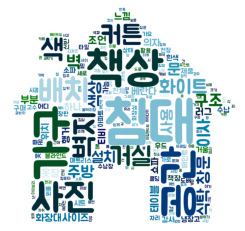

In [16]:
from PIL import Image # 이미지 관련 함수
import numpy as np
mask=np.array(Image.open('/content/gdrive/My Drive/NLP/yellow-house-hi.png'))
font_path='/content/gdrive/My Drive/폰트/BMJUA_ttf.ttf'

wordcloud = WordCloud(font_path=font_path,
                      background_color='white',
                      colormap = "ocean",
                      mask=mask,
                      width=5000, height=5000
                     ).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## bar plot

In [17]:
words_df = pd.DataFrame([words.values()],columns=words.keys()).T
words_df.columns=['num']
words_df

,num
침대,1067
책상,624
가구,601
공간,548
사진,548
...,...
감촉,1
둔적,1
장식품,1
승용차,1


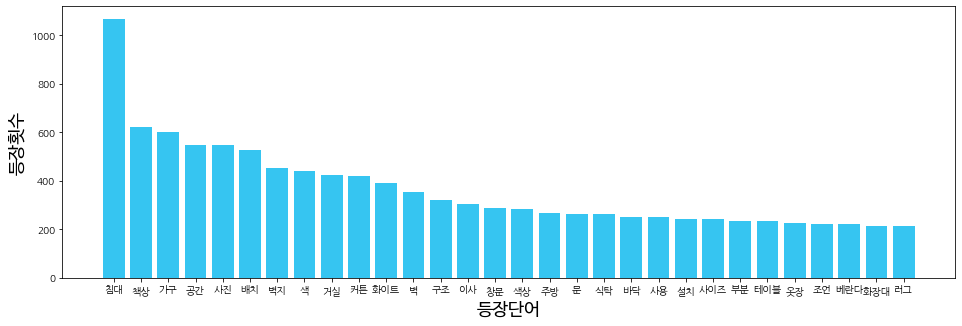

In [18]:
path = '/content/gdrive/My Drive/폰트/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.figure(figsize=(16,5))
plt.bar(words_df[:30].index,words_df['num'][:30],color='#36C5F1')
plt.xlabel("등장단어",fontproperties=fontprop)
plt.ylabel("등장횟수",fontproperties=fontprop)

plt.show()

In [19]:
# # 토큰빈도계산 : CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# #선언
# count_vect = CountVectorizer()
# BoW = count_vect.fit_transform(contents)
# vocab = count_vect.get_feature_names()
# print(vocab)

## LDA

In [20]:
okt_tokenized_doc[:4]

['벽지 바닥 도배 그대로 가져가다 여기 원목 창살 침대 어울리다 요 창문 블라인드 블라인드 같다 우드 계열 맞추다 되다 침대 창문 밑 놓다 젛을 위치 되다',
 '베란다 장판 밑 나무 깔다 장마 나무 썪었는 틀어지다 뜯다 요즘 나오다 데크 깔다 견적 나오다 요 기억 자로 베란다 편이',
 '서랍 정보 궁금하다',
 '다이소 팔다 줄눈 보수 화장실 바닥 타일 사이 사 용법 알 완전 말르다 버리다 후 줄눈 주변 타일 닦다 하니 떨어지다 우선 칼날 헤라 빡빡 긁다 하필 욕실 타일 바닥 표면 무늬 긁다 내기 힘드다 월세 자취 큰일 나다 혹시 지우다 아시 정보 정보 주시 모든 미리 감사하다']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(okt_tokenized_doc)
lda = LatentDirichletAllocation(n_components=3, max_iter=20, learning_method='online')

lda_output = lda.fit_transform(tfidf)

In [22]:
!pip install pyLDAvis

In [23]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)